In [ ]:
import comtradeapicall 
import sys
sys.path.append("../../")

import pandas as pd
from macroquant.dataapi.mq_comtrade import MQ_COMTRADE
from macroquant.utils.util_plot import *
from macroquant.utils.common import *

subscription_key = ''
comTrade= MQ_COMTRADE(subscription_key)
print("从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网")

从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网


In [2]:
WorldCode = '0'
CHNCode= '156'
USACode= '842'

years = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

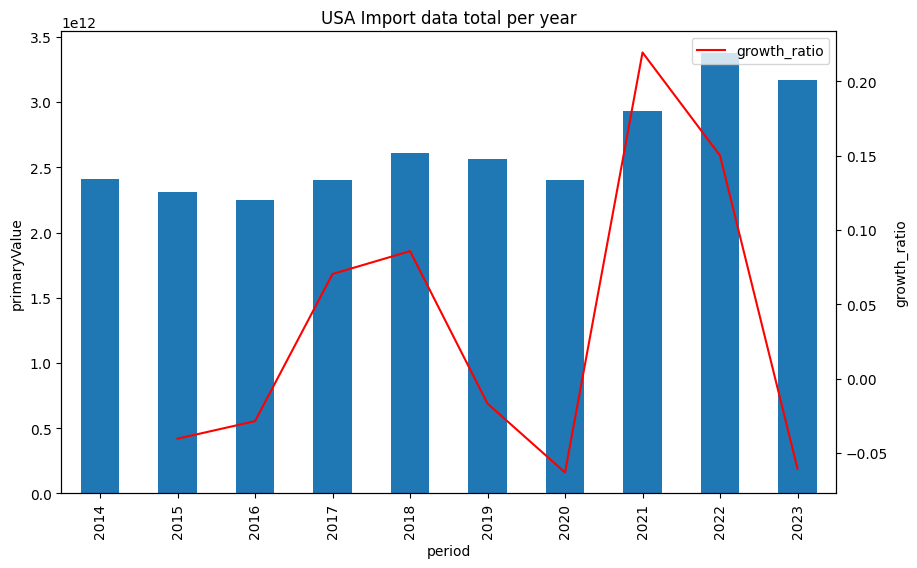

In [3]:
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=WorldCode, cmdArr=[], flowCode='M', freqCode='A')
df.index=df.period
total = df
total['preValue'] = total.shift(1)['primaryValue']
total['growth_ratio'] = (total['primaryValue']-total['preValue'])/total['preValue']
plot_bar_line(total['primaryValue'], total['growth_ratio'], title='USA Import data total per year')

In [4]:
year1 = str(years[0])
year2 = str(years[-1])
cmdArr = comTrade.get_cmdcode_children()
df = comTrade.get_final_with_years([year1,year2], reporterCode=USACode, partnerCode=WorldCode, cmdArr=cmdArr, flowCode='M', freqCode='A')
df.index=df.period
ratio_db = pd.DataFrame()
for cmd in cmdArr:
    dd = df[df['cmdCode']==f'{cmd:02d}']
    if len(dd)>0:
        s={'cmdDesc':dd.iloc[0]['cmdDesc'], year1:dd.loc[year1]['primaryValue'], year2:dd.loc[year2]['primaryValue']}
        ratio_db = AppendSeries(ratio_db, pd.Series(s, name=cmd), ignore_index=False)
ratio_db[f'{year1}_ratio'] = ratio_db[year1]/total.loc[year1]['primaryValue']
ratio_db[f'{year2}_ratio'] = ratio_db[year2]/total.loc[year2]['primaryValue']
ratio_db['ratio_diff'] = ratio_db[f'{year2}_ratio']-ratio_db[f'{year1}_ratio']
ratio_db['value_diff'] = (ratio_db[year2]-ratio_db[year1])/ratio_db[year1]
world_ratio_db = ratio_db.sort_values(by='ratio_diff')
world_ratio_db.head(10)

,cmdDesc,2014,2023,2014_ratio,2023_ratio,ratio_diff,value_diff
27,"Mineral fuels, mineral oils and products of th...",358259446903.0,266592032220.0,0.148603,0.084139,-0.064464,-0.255869
61,Apparel and clothing accessories; knitted or c...,46627467575.0,45244511786.0,0.019341,0.01428,-0.005061,-0.02966
88,"Aircraft, spacecraft and parts thereof",34469899283.0,30158075143.0,0.014298,0.009518,-0.00478,-0.12509
62,Apparel and clothing accessories; not knitted ...,39099512733.0,36346897291.0,0.016218,0.011471,-0.004747,-0.0704
72,Iron and steel,36000221552.0,33156046816.0,0.014933,0.010464,-0.004468,-0.079004
64,Footwear; gaiters and the like; parts of such ...,27044538948.0,26791726775.0,0.011218,0.008456,-0.002762,-0.009348
29,Organic chemicals,54711120735.0,66588583346.0,0.022694,0.021016,-0.001678,0.217094
94,"Furniture; bedding, mattresses, mattress suppo...",55782890791.0,69006760592.0,0.023138,0.021779,-0.001359,0.23706
42,Articles of leather; saddlery and harness; tra...,13871141319.0,13924378530.0,0.005754,0.004395,-0.001359,0.003838
40,Rubber and articles thereof,29053980378.0,34843081422.0,0.012051,0.010997,-0.001055,0.199253


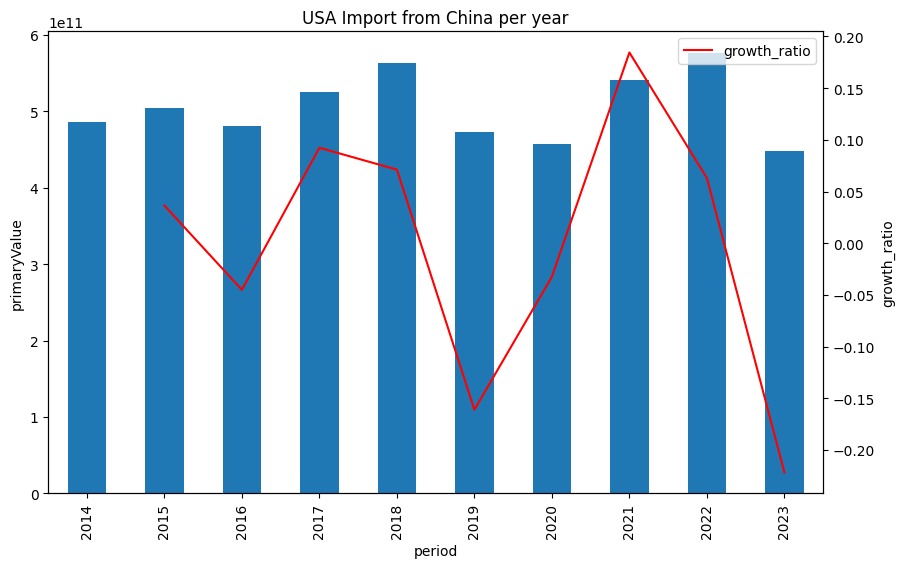

In [5]:
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=CHNCode, cmdArr=[], flowCode='M', freqCode='A')
df.index=df.period
total = df
total['preValue'] = total.shift(1)['primaryValue']
total['growth_ratio'] = (total['primaryValue']-total['preValue'])/total['preValue']
plot_bar_line(total['primaryValue'], total['growth_ratio'], title='USA Import from China per year')

In [6]:
year1 = str(years[0])
year2 = str(years[-1])
cmdArr = comTrade.get_cmdcode_children()
df = comTrade.get_final_with_years([year1,year2], reporterCode=USACode, partnerCode=CHNCode, cmdArr=cmdArr, flowCode='M', freqCode='A')
df.index=df.period
ratio_db = pd.DataFrame()
for cmd in cmdArr:
    dd = df[df['cmdCode']==f'{cmd:02d}']
    if len(dd)>0:
        s={'cmdDesc':dd.iloc[0]['cmdDesc'], year1:dd.loc[year1]['primaryValue'], year2:dd.loc[year2]['primaryValue']}
        ratio_db = AppendSeries(ratio_db, pd.Series(s, name=cmd), ignore_index=False)
ratio_db[f'{year1}_ratio'] = ratio_db[year1]/total.loc[year1]['primaryValue']
ratio_db[f'{year2}_ratio'] = ratio_db[year2]/total.loc[year2]['primaryValue']
ratio_db['ratio_diff'] = ratio_db[f'{year2}_ratio']-ratio_db[f'{year1}_ratio']
ratio_db['value_diff'] = (ratio_db[year2]-ratio_db[year1])/ratio_db[year1]
ratio_db = ratio_db.sort_values(by='ratio_diff')
ratio_db.head(10)

,cmdDesc,2014,2023,2014_ratio,2023_ratio,ratio_diff,value_diff
84,"Nuclear reactors, boilers, machinery and mecha...",108162321667.0,85889376499.0,0.222421,0.19171,-0.030711,-0.205921
64,Footwear; gaiters and the like; parts of such ...,17770693479.0,10039054349.0,0.036543,0.022408,-0.014135,-0.435078
62,Apparel and clothing accessories; not knitted ...,14922008788.0,7807753622.0,0.030685,0.017427,-0.013258,-0.476763
94,"Furniture; bedding, mattresses, mattress suppo...",28012625557.0,20285543547.0,0.057604,0.045278,-0.012326,-0.275843
61,Apparel and clothing accessories; knitted or c...,16724921864.0,9996062695.0,0.034392,0.022312,-0.012081,-0.402325
42,Articles of leather; saddlery and harness; tra...,8978385396.0,3296959013.0,0.018463,0.007359,-0.011104,-0.632789
40,Rubber and articles thereof,6210997829.0,2691575965.0,0.012772,0.006008,-0.006764,-0.566644
72,Iron and steel,2753685370.0,612964049.0,0.005663,0.001368,-0.004294,-0.777402
71,"Natural, cultured pearls; precious, semi-preci...",3672249082.0,1741277014.0,0.007551,0.003887,-0.003665,-0.525828
44,Wood and articles of wood; wood charcoal,4057365894.0,2158492241.0,0.008343,0.004818,-0.003526,-0.468007


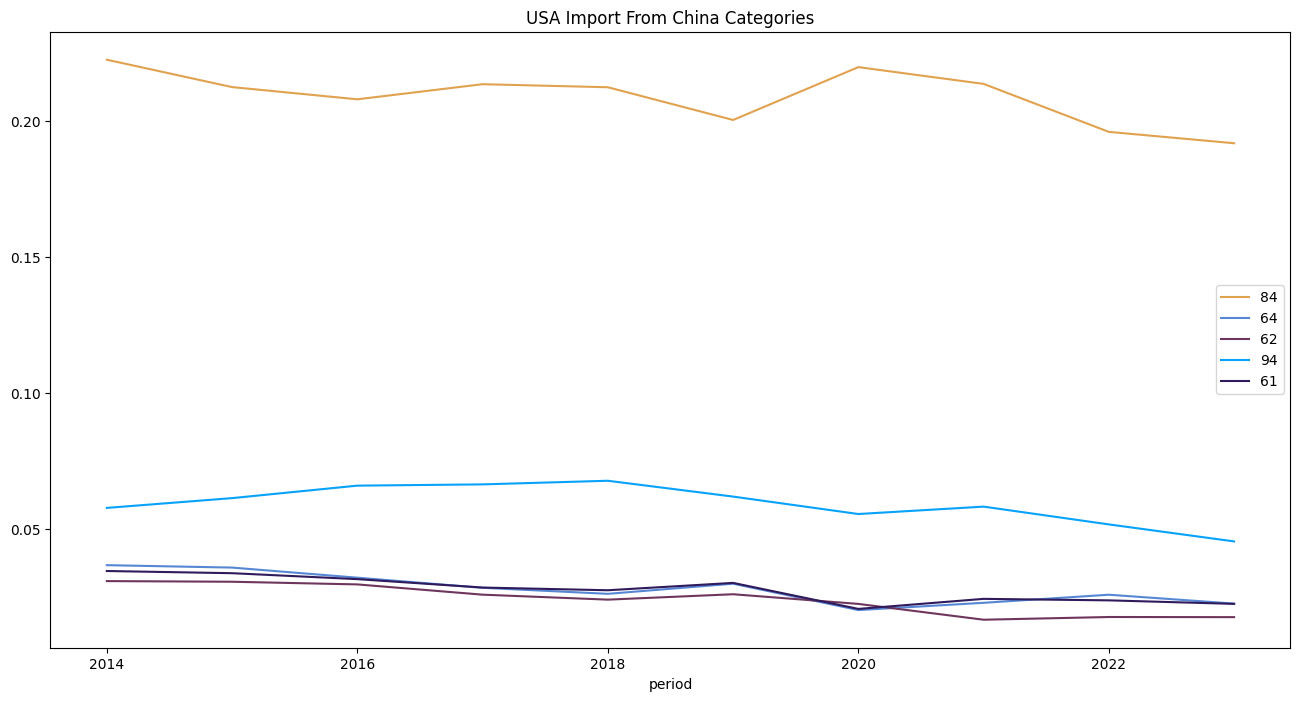

In [7]:
N = 5
cmdArr = ratio_db.head(N).index.tolist()
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=CHNCode, cmdArr=cmdArr, flowCode='M', freqCode='A')
for i in df.index:
    y = df.loc[i]['period']
    df.loc[i,'ratio'] = df.loc[i]['primaryValue']/total.loc[y]['primaryValue']
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
for cmd in cmdArr:
    dd = df[df['cmdCode']==f'{cmd:02d}']
    dd.index=dd.period
    s = dd['ratio'].copy()
    s.name = cmd
    s.plot(legend=True, color= random_color(), title='USA Import From China Categories')